### Antes de podermos executar nosso código, nós faremos todos os imports necessários para esse notebook

- Utilizaremos a biblioteca Pandas para trabalhar com os datasets
- Numpy para criar uma lista de itens numéricos
- Matplotlib para plotar alguns gráficos interessantes
- Seaborn para visualizar um Heatmap mais interessante

In [5]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Primeiro vamos dar uma olhada no nosso dataset que será utilizado no treinamento

In [6]:
# Read dataset from CSV
df = pd.read_csv('../clean_dataset.csv')
df.head(50)

         elo     games    remakes  playing_time     kills    deaths   assists  \
0     Bronze  0.804901   3.105339     -0.424502  1.012345  1.530940  0.721662   
1     Bronze -0.433867   0.376070     -0.336320 -0.405432 -0.451647 -0.447535   
2     Bronze -0.376250  -0.013825     -0.081573 -0.341197 -0.342468 -0.342885   
3     Bronze  0.142304   0.376070     -0.522481 -0.235666  0.312604  0.422146   
4     Bronze -0.505888  -0.403721      0.908020 -0.476551 -0.506237 -0.525121   
5     Bronze -0.520293  -0.403721     -0.620461 -0.478845 -0.513681 -0.525121   
6     Bronze -0.520293  -0.403721     -0.620461 -0.478845 -0.513681 -0.525121   
7     Bronze -0.520293  -0.403721     -0.620461 -0.478845 -0.513681 -0.525121   
8       Gold  0.271943   1.545757     -0.502885 -0.098018  0.076877  0.990506   
9     Silver -0.520293  -0.403721     -0.620461 -0.478845 -0.513681 -0.525121   
10    Silver -0.131377  -0.403721      0.780647 -0.196666 -0.121629 -0.202148   
11    Silver -0.520293  -0.4

### Não parece nos dizer muita coisa, mas pelo menos vimos que estão corretos os dados e as colunas
### Devido a quantidade de colunas vamos criar um dataset apenas com as colunas númericas que não foram convertidas para OneHot, facilitando nossa análise

In [43]:
analysis_df = df.iloc[:, :12]
analysis_df.head(50)

,elo,games,remakes,playing_time,kills,deaths,assists,gold,pentakills,wards,minions,damage
0,Bronze,0.804901,3.105339,-0.424502,1.012345,1.530940,0.721662,0.785667,-0.175990,0.618892,0.472435,0.921534
1,Bronze,-0.433867,0.376070,-0.336320,-0.405432,-0.451647,-0.447535,-0.429137,-0.175990,-0.419391,-0.383739,-0.433727
2,Bronze,-0.376250,-0.013825,-0.081573,-0.341197,-0.342468,-0.342885,-0.366599,-0.175990,-0.322206,-0.356089,-0.313700
3,Bronze,0.142304,0.376070,-0.522481,-0.235666,0.312604,0.422146,0.003549,-0.175990,0.076377,-0.192311,-0.086586
4,Bronze,-0.505888,-0.403721,0.908020,-0.476551,-0.506237,-0.525121,-0.507050,-0.175990,-0.472289,-0.470445,-0.496160
5,Bronze,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412
6,Bronze,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412
7,Bronze,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412
8,Gold,0.271943,1.545757,-0.502885,-0.098018,0.076877,0.990506,0.190903,-0.175990,1.237680,-0.259749,0.071251
9,Silver,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412


### Vamos plotar alguns gráficos para tirarmos algumas conclusões

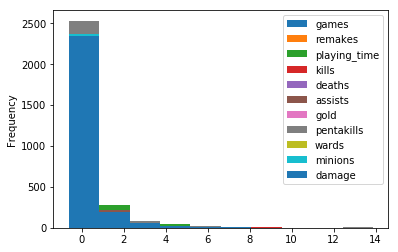

In [44]:
analysis_df.plot.hist()

### O histograma gerado não nos disse muita coisa, vamos tentar ver a correlação das features para entender como elas se relacionam

In [45]:
analysis_df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,games,remakes,playing_time,kills,deaths,assists,gold,pentakills,wards,minions,damage
games,1,0.744,-0.0239,0.95,0.974,0.959,0.994,0.37,0.916,0.953,0.968
remakes,0.744,1,-0.0246,0.708,0.737,0.717,0.746,0.244,0.709,0.692,0.718
playing_time,-0.0239,-0.0246,1,-0.0212,-0.0238,-0.0262,-0.0232,-0.00449,-0.024,-0.0191,-0.02
kills,0.95,0.708,-0.0212,1,0.942,0.85,0.974,0.457,0.791,0.973,0.985
deaths,0.974,0.737,-0.0238,0.942,1,0.927,0.974,0.386,0.87,0.932,0.961
assists,0.959,0.717,-0.0262,0.85,0.927,1,0.93,0.305,0.954,0.84,0.885
gold,0.994,0.746,-0.0232,0.974,0.974,0.93,1,0.4,0.879,0.976,0.985
pentakills,0.37,0.244,-0.00449,0.457,0.386,0.305,0.4,1,0.263,0.421,0.429
wards,0.916,0.709,-0.024,0.791,0.87,0.954,0.879,0.263,1,0.778,0.827
minions,0.953,0.692,-0.0191,0.973,0.932,0.84,0.976,0.421,0.778,1,0.977


### Parece que temos correlações bem fortes entre diversas features enquanto o tempo de partida parece não influenciar em nada nas outras

### Vamos ver como os dados se comportam uns contra os outros

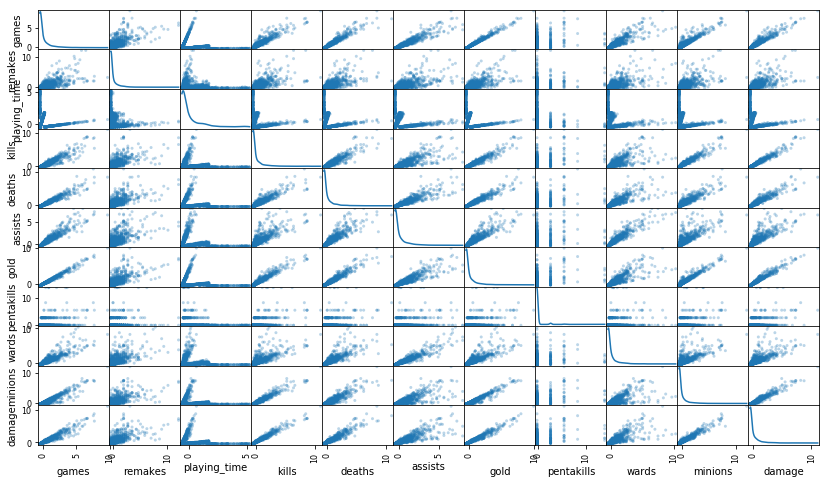

In [9]:
scatter_matrix(analysis_df, alpha=0.3, figsize=(14, 8), diagonal='kde')

### Como pudemos ver no nosso heatmap anterior, alguns dados possuem uma forte relação, a quantidade de outro com a quantidade de jogos, por exemplo

### Vamos gerar um heatmap mais bonito com o seabonr para facilitar a visualização

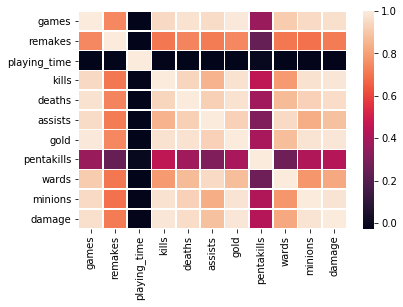

In [10]:
sns.heatmap(analysis_df.corr(), linewidth=.5)

### Parece que Games, Damage e Assists tem uma correlação com todas as outras features, será que devemos tirar essas colunas?

<p>_____________________________________________________________________________________________________________________________</p>


## Vamos criar um outro dataset com os champions

- Esse dataset servirá para analisar a influência do campeão na nossa coluna de target
- Para analisar a influência veremos se existem divergências marcantes entre os champions, ou seja, se um champion pode determinar o elo do jogador

In [46]:
champions_dataset = pd.read_csv('../clean_dataset_with_champions.csv')
champions_dataset.head(50)

,elo,games,remakes,playing_time,kills,deaths,assists,gold,pentakills,wards,minions,damage,champion_1,champion_2,champion_2.1
0,Bronze,0.804901,3.105339,-0.424502,1.012345,1.530940,0.721662,0.785667,-0.175990,0.618892,0.472435,0.921534,Katarina,Xin Zhao,Xin Zhao
1,Bronze,-0.433867,0.376070,-0.336320,-0.405432,-0.451647,-0.447535,-0.429137,-0.175990,-0.419391,-0.383739,-0.433727,KaiSa,Xayah,Xayah
2,Bronze,-0.376250,-0.013825,-0.081573,-0.341197,-0.342468,-0.342885,-0.366599,-0.175990,-0.322206,-0.356089,-0.313700,Leona,Kled,Kled
3,Bronze,0.142304,0.376070,-0.522481,-0.235666,0.312604,0.422146,0.003549,-0.175990,0.076377,-0.192311,-0.086586,Morgana,Soraka,Soraka
4,Bronze,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412,Nami,Neeko,Neeko
5,Bronze,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412,Morgana,Braum,Braum
6,Bronze,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412,Shaco,Tryndamere,Tryndamere
7,Gold,0.271943,1.545757,-0.502885,-0.098018,0.076877,0.990506,0.190903,-0.175990,1.237680,-0.259749,0.071251,Ezreal,Zac,Zac
8,Silver,-0.520293,-0.403721,-0.620461,-0.478845,-0.513681,-0.525121,-0.511219,-0.175990,-0.484591,-0.471697,-0.497412,Vayne,Katarina,Katarina
9,Silver,-0.275420,-0.403721,0.173174,-0.196666,-0.282916,-0.323038,-0.249731,-0.175990,-0.303753,-0.163409,-0.217546,Quinn,Karma,Karma


### Agora nós podemos visualizar os campeões pelos nomes e não por colunas binarizadas

### Para obter os dados que queremos, vamos inicializar uma variável e atribuir a ela os campeões e quantas vezes ele aparece em cada elo, ou seja
### katarina -> bronze -> 3 
### katarina -> prata -> 10

In [12]:
champion_eloCounter = {}
for row in champions_dataset.iterrows():
    row = row[1]
    if row.get('champion_1') in champion_eloCounter:
        if row.get('elo') in champion_eloCounter[row.get('champion_1')]:
            champion_eloCounter[row.get('champion_1')][row.get('elo')] += 1
        else:
            champion_eloCounter[row.get('champion_1')][row.get('elo')] = 1
    else:
        champion_eloCounter[row.get('champion_1')] = {row.get('elo'): 1}

### Acontece que temos mais de 100 campeões, para termos uma imagem disso nós precisamos limitar quantos serão "vistos"

In [36]:
menor = {}
for idx, champ in enumerate(champion_eloCounter):
    if idx == 15:
        break
    menor[champ] = champion_eloCounter[champ]
    
bronze_bars = []
silver_bars = []
golden_bars = []
platinum_bars = []
diamond_bars = []
master_bars = []
challenger_bars = []

for champ in menor:
    if 'Bronze' not in menor[champ]:
        bronze_bars.append(0)
    else:
        bronze_bars.append(menor[champ]['Bronze'])

    if 'Silver' not in menor[champ]:
        silver_bars.append(0)
    else:
        silver_bars.append(menor[champ]['Silver'])

    if 'Golden' not in menor[champ]:
        golden_bars.append(0)
    else:
        golden_bars.append(menor[champ]['Golden'])

    if 'Platinum' not in menor[champ]:
        platinum_bars.append(0)
    else:
        platinum_bars.append(menor[champ]['Platinum'])

    if 'Diamond' not in menor[champ]:
        diamond_bars.append(0)
    else:
        diamond_bars.append(menor[champ]['Diamond'])

    if 'Master' not in menor[champ]:
        master_bars.append(0)
    else:
        master_bars.append(menor[champ]['Master'])

    if 'Challenger' not in menor[champ]:
        challenger_bars.append(0)
    else:
        challenger_bars.append(menor[champ]['Challenger'])

### Quantidade de campeões limitadas, só precisamos plotar no gráfico, para isso iremos utilizar um gráfico de barras. Cada campeão terá 7 barras representando a quantidade de vezes que ele se repete em cada elo

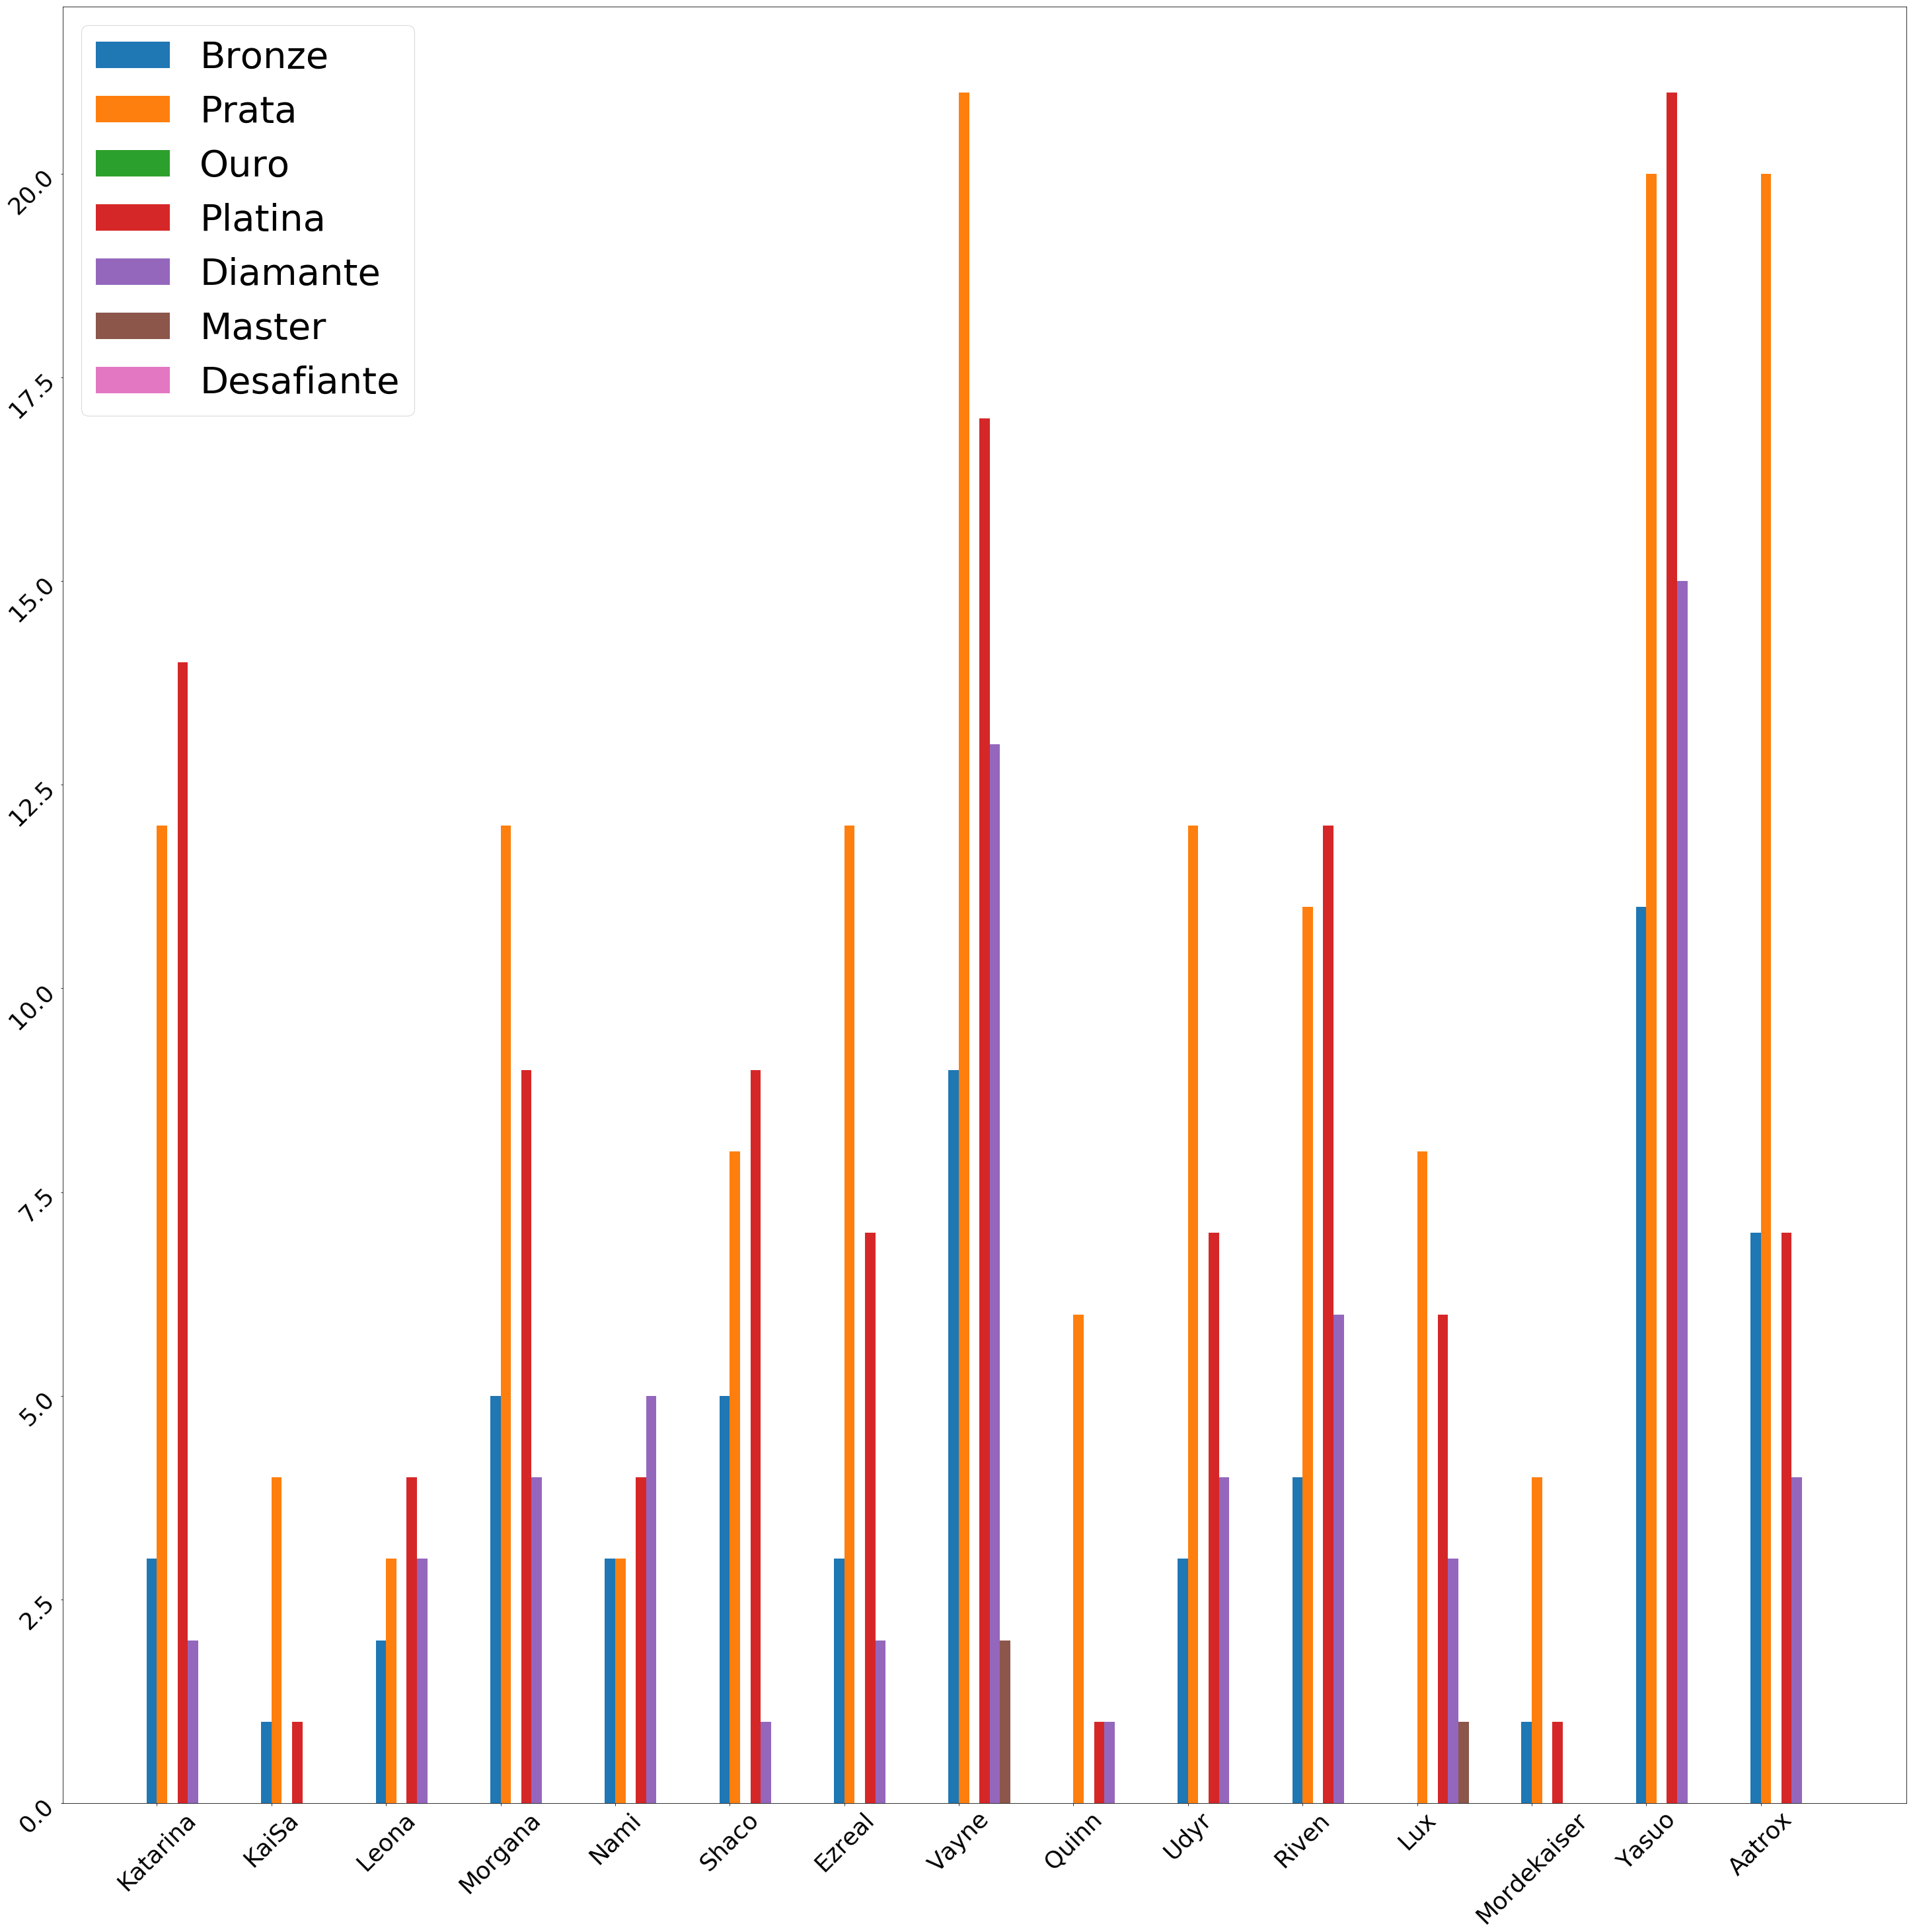

In [41]:
fig, ax = plt.subplots(figsize=(50, 50))
ind = np.arange(len(menor))
width = .09
bronze_bar = ax.bar(ind, bronze_bars, width)
silver_bar = ax.bar(ind + width, silver_bars, width)
golden_bar = ax.bar(ind + width * 2, golden_bars, width)
platinum_bar = ax.bar(ind + width * 3, platinum_bars, width)
diamond_bar = ax.bar(ind + width * 4, diamond_bars, width)
master_bar = ax.bar(ind + width * 5, master_bars, width)
challenger_bar = ax.bar(ind + width * 6, challenger_bars, width)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels((menor.keys()))
ax.tick_params(axis='both', labelsize=36, which='major', rotation=45)
ax.tick_params(axis='both', labelsize=36, which='major', rotation=45)

ax.legend((bronze_bar[0], silver_bar[0], golden_bar[0], platinum_bar[0], diamond_bar[0], master_bar[0], challenger_bar[0]), ('Bronze', 'Prata', 'Ouro', 'Platina', 'Diamante', 'Master', 'Desafiante'), prop=dict(size=56))
ax.autoscale_view()


### Podemos ver que alguns elos se repetem quase todos os campeões, mas alguns outros são mais expressivos, como por exemplo o elo "Master" que possui "Yasuo" e "Vayne" jogando criando a relação de que quem joga de Yasuo possui mais chances de ser do elo Master